In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Now it's time for another guided example. This time we're going to look at recipes. Specifically we'll use the epicurious dataset, which has a collection of recipes, key terms and ingredients, and their ratings.

What we want to see is if we can use the ingredient and keyword list to predict the rating. For someone writing a cookbook this could be really useful information that could help them choose which recipes to include because they're more likely to be enjoyed and therefore make the book more likely to be successful.

First let's load the dataset. It's [available on Kaggle](https://www.kaggle.com/hugodarwood/epirecipes). We'll use the csv file here and as pull out column names and some summary statistics for ratings.

In [2]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [4]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

We learn a few things from this analysis. From a ratings perspective, there are just over 20,000 recipes with an average rating of 3.71. What is interesting is that the 25th percentile is actually above the mean. This means there is likely some kind of outlier population. This makes sense when we think about reviews: some bad recipes may have very few very low reviews.

Let's validate the idea a bit further with a histogram.

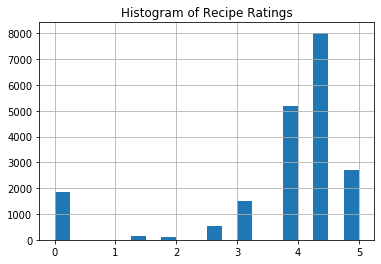

In [5]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

So a few things are shown in this histogram. Firstly there are sharp discontinutities. We don't have continuous data. No recipe has a 3.5 rating, for example. Also we see the anticipated increase at 0.

Let's try a naive approach again, this time using SVM Regressor. But first, we'll have to do a bit of data cleaning.

In [6]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

What we can see right away is that nutrition information is not available for all goods. Now this would be an interesting data point, but let's focus on ingredients and keywords right now. So we'll actually drop the whole columns for calories, protein, fat, and sodium. We'll come back to nutrition information later.

In [7]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = raw_data.rating.sample(frac=0.3, replace=True, random_state=1)
svr.fit(X,Y)



/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

__Note that this actually takes quite a while to run, compared to some of the models we've done before. Be patient.__ It's because of the number of features we have.

Let's see what a scatter plot looks like, comparing actuals to predicted.

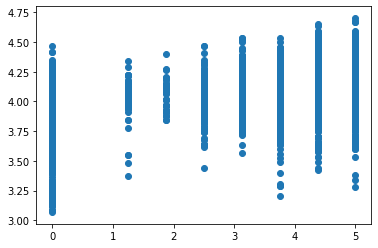

In [8]:
plt.scatter(Y, svr.predict(X))

Now that is a pretty useless visualization. This is because of the discontinuous nature of our outcome variable. There's too much data for us to really see what's going on here. If you wanted to look at it you could create histograms, here we'll move on to the scores of both our full fit model and with cross validation. Again if you choose to run it again it will take some time, so you probably shouldn't.

## svr.score(X, Y)

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Mahfuz-Tamim/anaconda3/lib/

array([-0.01787926, -0.02916288, -0.02841122, -0.03767394, -0.01735362])

Oh dear, so this did seem not to work very well. In fact it is remarkably poor. Now there are many things that we could do here. 

Firstly the overfit is a problem, even though it was poor in the first place. We could go back and clean up our feature set. There might be some gains to be made by getting rid of the noise.

We could also see how removing the nulls but including dietary information performs. Though its a slight change to the question we could still possibly get some improvements there.

Lastly, we could take our regression problem and turn it into a classifier. With this number of features and a discontinuous outcome, we might have better luck thinking of this as a classification problem. We could make it simpler still by instead of classifying on each possible value, group reviews to some decided high and low values.

__And that is your challenge.__

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

Good luck!

When you've finished that, also take a moment to think about bias. Is there anything in this dataset that makes you think it could be biased, perhaps extremely so?

There is. Several things in fact, but most glaringly is that we don't actually have a random sample. It could be, and probably is, that the people more likely to choose some kinds of recipes are more likely to give high reviews.

After all, people who eat chocolate _might_ just be happier people.

In [21]:
# make df that drops the columns with nulls
raw_data1 = raw_data.copy()
raw_data1.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)

#Check if ratings are evenly spaced apart for categories.
target_values = sorted(list(set(raw_data1.rating)))

print(target_values)
print(len(target_values))

[0.0, 1.25, 1.875, 2.5, 3.125, 3.75, 4.375, 5.0]
8


In [22]:
# what is the difference between each target value?
np.diff(target_values)

array([1.25 , 0.625, 0.625, 0.625, 0.625, 0.625, 0.625])

We can therefore make 8 categories that are all evenly distributed except the first (0) and second (1.25) entry which seem to be missing a middle target (.625) in between.

In [24]:
# Let's make a correlation matrix, isolating the ratings column:
corr = raw_data1.corr()
corr_target = abs(corr["rating"])
corr_target.sort_values(ascending=False)

rating            1.000000
drink             0.241388
alcoholic         0.224767
house & garden    0.217911
gin               0.191400
                    ...   
hollywood         0.000187
mardi gras        0.000152
artichoke         0.000081
goose             0.000074
colorado          0.000074
Name: rating, Length: 679, dtype: float64

In [84]:
def get_clf_score(df,trgt_col,clfx=SVC()):
    clf = clfx
    X = df.drop([trgt_col], 1).sample(frac=0.3, replace=True, random_state=1)
    Y = df[trgt_col].sample(frac=0.3, replace=True, random_state=1)
    clf.fit(X,Y)
    tscore = clf.score(X, Y)
    print('Classfier Score:{}\n'.format(tscore))
    plt.scatter(Y, clf.predict(X))
    return tscore

In [85]:
for corr_value in [.02,0.03,0.04,0.05,0.06]:
    print('Filter Factor:{}'.format(corr_value))
    # these are the columns we want to keep after filtering
    keep_cols = list(corr_target[corr_target>corr_value].index)
    print('Columns:{}'.format(len(keep_cols)))
    test_data1 = raw_data1[keep_cols]
    test_scores = get_clf_score(test_data1,'rating')

Filter Factor:0.02
Columns:62


KeyError: "['new_rating'] not in index"

Using a value of .05 as a filter factor gives us 37 columns but the SVR score is best with a filter factor of .04 (this means we are keeping columns that are greater than the absolute value of .04 in the correlation metric between rating and numeric columns). The graph is tentatively not helpful.

In [86]:
filter_factor = 0.04
print('Filter Factor:{}'.format(filter_factor))
keep_cols = list(corr_target[corr_target>filter_factor].index)
print('Columns:{}'.format(len(keep_cols)))
raw_data1['rating'].value_counts().to_frame().sort_index()

Filter Factor:0.04
Columns:38


,rating
0.000,1836
1.250,164
1.875,124
2.500,532
3.125,1489
3.750,5169
4.375,8019
5.000,2719


We can see that the data is not distributed evenly.
Let's make new a new rating system of high, middle and low ratings, represented by 3,2,1, respectively. 

#The categories will be:
1. 0 to 2.5
2. 2.5 to 3.75 
3. 4.375 to 5


In [87]:
test_data2 = raw_data1[keep_cols].copy()
test_data2['new_rating'] = test_data2['rating'].copy()
test_data2.loc[test_data2['rating'] < 2.5 , 'new_rating'] = 1
test_data2.loc[test_data2['rating'] >= 2.5, 'new_rating'] = 2
test_data2.loc[test_data2['rating'] > 4 , 'new_rating'] = 3
test_data2

KeyError: "['new_rating'] not in index"

In [88]:
test_data2['new_rating'].value_counts().to_frame().sort_index()

,new_rating
1.0,2124
2.0,7190
3.0,10738


In [89]:
# Let's make a correlation matrix, isolating the new_ratings column:
corr = test_data2.corr()
corr_target = abs(corr["new_rating"])
corr_target.sort_values(ascending=False)

new_rating        1.000000
rating            0.893865
drink             0.186040
alcoholic         0.173472
house & garden    0.171767
                    ...   
champagne         0.031069
whiskey           0.029775
chile pepper      0.027861
gourmet           0.013029
quick & easy      0.011208
Name: new_rating, Length: 65, dtype: float64

Filter Factor:0.02
Columns:63


/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Classfier Score:0.9981715425531915

Filter Factor:0.03
Columns:61


/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Classfier Score:0.9986702127659575

Filter Factor:0.04
Columns:39


/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Classfier Score:0.9998337765957447

Filter Factor:0.05
Columns:25


/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Classfier Score:1.0

Filter Factor:0.06
Columns:22


/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Classfier Score:1.0



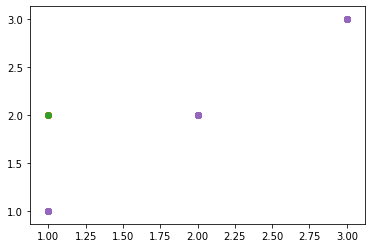

In [90]:
for corr_value in [.02,0.03,0.04,0.05,0.06]:
    print('Filter Factor:{}'.format(corr_value))
    # these are the columns we want to keep after filtering
    keep_cols = list(corr_target[corr_target>corr_value].index)
    print('Columns:{}'.format(len(keep_cols)))
    test_data3 = test_data2[keep_cols]
    test_scores = get_clf_score(test_data3,'new_rating')

Filter Factor:0.02
Columns:62


/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Classfier Score:0.5488696808510638

Filter Factor:0.03
Columns:60


/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Classfier Score:0.5490359042553191

Filter Factor:0.04
Columns:38


/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Classfier Score:0.5475398936170213

Filter Factor:0.05
Columns:24


/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Classfier Score:0.5508643617021277

Filter Factor:0.06
Columns:21


/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Classfier Score:0.5523603723404256



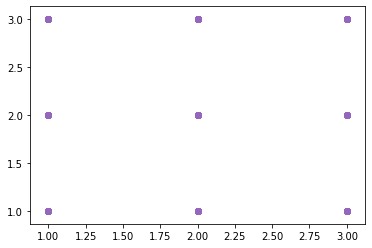

In [91]:
# Let's make a correlation matrix, isolating the new_ratings column:
test_data4 = test_data2.drop(columns = ['rating'])
corr = test_data4.corr()
corr_target = abs(corr["new_rating"])
corr_target.sort_values(ascending=False)

for corr_value in [.02,0.03,0.04,0.05,0.06]:
    print('Filter Factor:{}'.format(corr_value))
    # these are the columns we want to keep after filtering
    keep_cols = list(corr_target[corr_target>corr_value].index)
    print('Columns:{}'.format(len(keep_cols)))
    test_data5 = test_data4[keep_cols]
    test_scores = get_clf_score(test_data5,'new_rating')

Filter Factor:0.02
Columns:62
Classfier Score:0.5568484042553191

Filter Factor:0.03
Columns:60
Classfier Score:0.5568484042553191

Filter Factor:0.04
Columns:38
Classfier Score:0.554188829787234

Filter Factor:0.05
Columns:24
Classfier Score:0.5523603723404256

Filter Factor:0.06
Columns:21
Classfier Score:0.5520279255319149



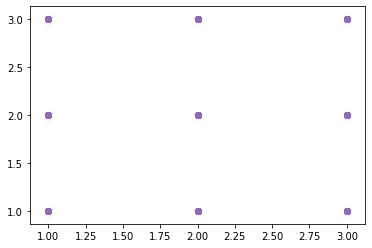

In [92]:
from sklearn.svm import SVC # "Support Vector Classifier" 
clf = SVC(kernel='linear') 

for corr_value in [.02,0.03,0.04,0.05,0.06]:
    print('Filter Factor:{}'.format(corr_value))
    # these are the columns we want to keep after filtering
    keep_cols = list(corr_target[corr_target>corr_value].index)
    print('Columns:{}'.format(len(keep_cols)))
    test_data5 = test_data4[keep_cols]
    test_scores = get_clf_score(test_data5,'new_rating',clf)

Using SVM classifier gave rise to a better classifier score. However, the graph we made was not helpful since we can't see overlapping points. This could be rectified later down the line. 